# PatientSecure Smart Scanning 2.0 - A Primer for Deep Learning

## Introduction

The following is by no means a guide, but rather a primer into the world of machine learning, and an introduction to Tensorflow.

This interactive Jupyter notebook will contain several code snippets that you can run from within the document to see how they work. If you'd like to use your own machine to follow along or explore on your own, make sure that you have python v3.8.x installed.

## Neural Networks

We will be utilizing a technique called Deep Learning which relies on neural networks as its foundation. A neural network, as shown below, is comprised of several "layers". 

![Neural Network Diagram](images/neural-network-diagram.png)

You always have an input layer, which will be the incoming data to be processed. In our case, we would feed in an image as our input, but this can be anything like an array of integers, string of letters, audio clip, etc. 

Next comes what are called "hidden layers". They are described as such because, while we will be in control of how many and what the shape and properties of the different layers are, once we train the model, the actual weights and values contained in each node of the hidden layer are a mystery to us. This becomes a sort of black box, hence it is hidden from us. Normally, this would be a red flag, but it is not strictly necessary to know the weights. Once you have a grasp on how these networks operate, you can intuit what is happening under the hood. Deep learning refers to how "deep" a neural network is, with the number of hidden layers being described as the depth of a neural network. 

Finally we have the output layer. This can be designed in different ways to suit the needs of your end goal, but for image classification, which is what we will be using it for, this will normally be a layer comprised of _N_ nodes, where _N_ is the number of different classifications our model is dealing with. (i.e. Move hand forward, Move hand left, etc.)

When discussing hidden layers, I mentioned that each node contained a weight value. If we were to "zoom in" to one of these nodes, or neurons, we'd see what exactly is happening under the hood when this network is processing data.

![Neural Network Neuron Diagram](images/neural-network-neuron-diagram.png)

In the above diagram, you can see that each of the lines feeding into the node from the nodes in the preceeding layer contains some weight value and a bias value. These weights then get summed up and an "activation function" is applied. The output of the activation function is then sent as one of the inputs of all nodes in the next layer, and the process repeats for each node. 

These activation functions can be vastly different depending on what your use case is. If you run the code snippet below you will be able to see some common activation functions graphed out so that you see how the data will be manipulated.

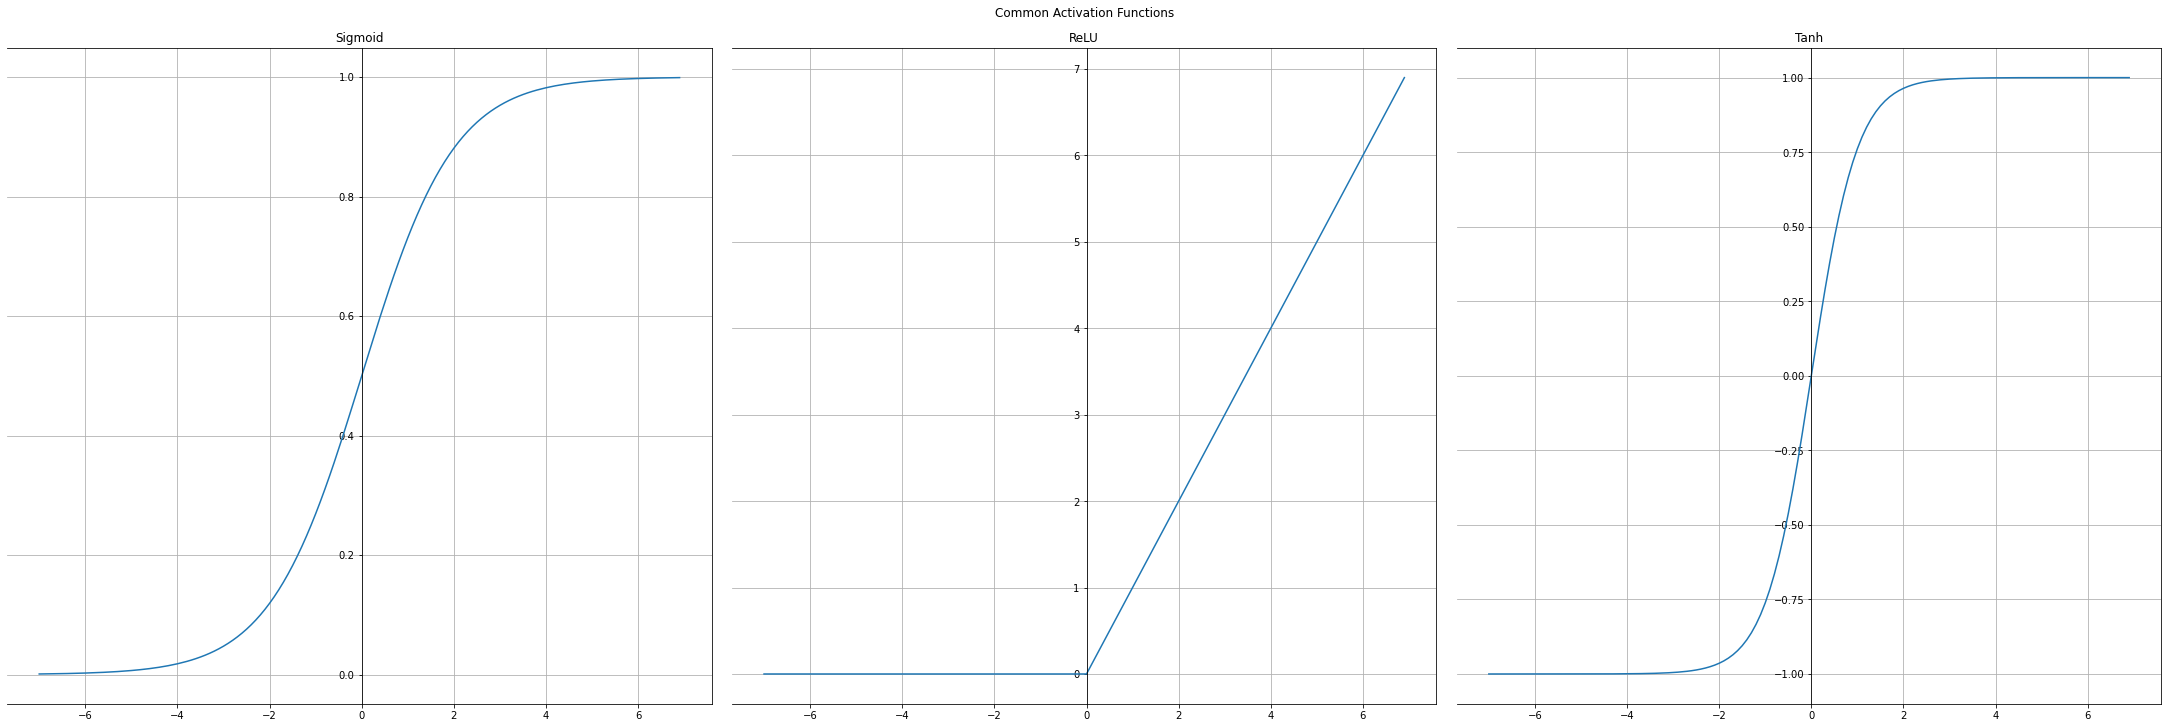

In [31]:
import math
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x: np.ndarray):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

def relu(x: np.ndarray):
    relu = np.copy(x)
    return np.maximum(relu, 0, relu)

def tanh(x: np.ndarray):
    a = []
    for item in x:
        a.append(math.tanh(item))
    return a

x = np.arange(-7., 7., 0.1)
sig = sigmoid(x)
rel = relu(x)
tan = tanh(x)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, constrained_layout=True)
fig.set_figwidth(30)
fig.set_figheight(10)
fig.suptitle('Common Activation Functions')
ax0.set_title('Sigmoid')
ax0.plot(x,sig)
ax0.grid(True, which='both')
ax0.spines['left'].set_position('zero')

ax1.set_title('ReLU')
ax1.plot(x,rel)
ax1.grid(True, which='both')
ax1.spines['left'].set_position('zero')

ax2.set_title('Tanh')
ax2.plot(x,tan)
ax2.grid(True, which='both')
ax2.spines['left'].set_position('zero')
plt.show()

Sigmoid functions are nice because you get a clean, non-negative value between 0.0 and 1.0. This is particularly useful in the output layer because the output values can be interpreted as percentages without needing further processing.

Relu functions seem to be the most common activation function for the hidden layers because then all the weights are positive values, instead of centering around 0 as their "equilibrium point".

Tanh functions are similar to sigmoid, but they output values between -1.0 and 1.0. This could be useful if you were trying to determine how above or below average something is. I find that this is less used, but that is not to say that it is bad.

Each of these activation functions are good in their own right, and it comes down to the use case to determine what you will use. If you are unsure, perform tests using different activation functions and go with the one that provides the best training results.



### Training

Now that you understand a little bit about how neural networks work, its time to talk about how to train a network. There are three main facets to training your neural network: the dataset, the model layout, and the concept of cost functions and backpropagation.

#### Datasets

Up to this point we haven't really talked about the input data aside from the fact that we will be using images. The way neural networks are normally trained for image classification is through a process called Supervised Learning. In this method, you have a dataset consisting of the data that you want to be analyzed (images in this case), and the labels or classifiers associated with said data. 

For a simple example, lets just say that we are trying to classify an image as containing either a dog or a cat. Our two labels, or classifiers, would be Dog and Cat. So, our dataset would contain a set of images that we have already gone through and attached a label to each image. This is the supervision part of Supervised Learning; we go through and manually classify the images in our dataset so that we have some training examples for the neural network to learn from. Think of it like training a child the difference between a cat and a dog. You can't just show them a bunch of pictures without telling them which is which and expect them to understand which is a cat and which is a dog. The same concept applies here.

Now there are some things to be aware of when generating a dataset. Firstly, you'll want to make sure that the dataset contains data that is relevent to **every single one** of your labels, while also avoiding any irrelevant data. In the cat/dog example, we wouldn't want a dataset to only consist of cats, because then it will think that everything is a cat. Likewise, you wouldn't want to have images of lawn chairs because they are neither a cat nor a dog and you will just degrade the accuracy of your network that way.

Secondly, you're going to want **a lot** of data. If you think its too much, you're wrong (though there are few exceptions that we will get to). For the most part, the more data you can train your network with, the more accurate your network will be. You're essentially giving it a lot of experience in classifying whatever images you give it, and it will continue to improve. There's a reason why, to this day, captcha is still asking you to identify stoplights or busses. Google uses that information to collect more training data for its autonomous vehicle AI.

Finally, you're going to want to make your dataset as diverse as possible, while still remaining relevant to the classifiers you've chosen. Going back to the cat/dog example, getting images of many different breeds of dog and cat, different lighting conditions, different camera angles, etc. will all help in preventing your network from overfitting to the training data and increase accuracy.

Overfitting is a term that you may start hearing more often as you start to dive more into machine learning. Essentially, it boils down to the dataset and how it is used during training. If you have a massive dataset, but they are all a bunch of pictures of the same breed of cat/dog, your model will overfit to the training data, meaning that it will think all cats have that particular color/body proportion, etc. and having a smaller dataset would actually improve your model's accuracy. That is why having a diverse dataset is key.

Conversely, you can also underfit your data. This can happen by not having enough data for your labels, or by not training the model long enough. This could be something along the lines of having 100 cat pictures, but only 10 dog pictures. This model would underfit the data and would be woefully inaccurate, specifically when trying to classify dogs. 

Learning how to play the balancing act takes time, but it is most of the battle when trying to compile your training data.


So once you compile your data, then what?

In [ ]:
import os, glob
from typing import Type, Tuple, Any
import tensorflow as tf
import numpy as np

def get_files_and_labels(root_path: str, file_ext: str='.jpg', color_channels: int=3) -> Tuple[list, list, int]:
    """
    Function that returns the a list of file paths, a list of labels, and the color channels used for the image 
    that match the file extension and are located in subdirectories of the provided root file path.

    Parameters
    ----------
        root_path: The base directory to search for files

        file_ext: The file extension of the images we are searching for. Defaults to '.jpg'.

        color_channels: The number of color channels used by an image (i.e. Grayscale = 1, RGB = 3, ARGB = 4). Defaults to RGB (3).

    Returns
    -------
        file_paths: List of paths to all files within the directory ``root_path`` that have a file extension matchin ``file_ext``.

        labels: List of labels corresponding to each file in ``file_paths``.

        color_channels: The number of color channels used by the image files in ``file_path``
    """
    file_paths = glob.glob('{}/**/*{}'.format(root_path, file_ext))
    labels  = [get_label(f) for f in file_paths]
    return file_paths, labels, color_channels

def get_label(file_path: str) -> str:
    """
    Function that returns a list of labels based on the directory that file_path resides in.
    
    Parameters
    ----------
        file_path: string representing path to an image file (i.e. .jpg, .png, etc.).
    
    Returns
    -------
        A label string corresponding to the name of the parent directory the file was in.
    """
    # convert the path to a list of path components
    parts = file_path.split(os.path.sep)
    # The second to last is the class-directory
    return parts[-2]

def parse_image(file_path: str, label: str, color_channels: int=3) -> Tuple[tf.Tensor, str]:
    """
    Function that returns a tuple of normalized image array and labels array.
    
    Parameters
    ----------
        file_path: string representing path to image

        label: 0/1 one-dimensional array of size N_LABELS

    Returns:
    -------
        image_normalized: The image from the file, resized and normalized to be a float `Tensor` with values ranging from [0.0, 1.0].

        label: The label that describes the image.
    """
    # Read an image from a file
    image_string = tf.io.read_file(file_path)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=color_channels)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_HEIGHT, IMG_WIDTH])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

def create_dataset(
    file_paths: list, 
    labels: list, 
    color_channels: int=3, 
    batch_size: int=256, 
    shuffle_buffer_size: int=1024, 
    is_training: bool=True, 
    repeat_dataset: bool=False) -> tf.data.Dataset:
    """
    Load and parse dataset.

    Parameters
    ----------
        file_paths: list of image paths

        labels: numpy array of shape (BATCH_SIZE, N_LABELS)

        is_training: boolean to indicate whether the dataset should be cached 
        (Only use this for small datasets that can be kept in memory).

        repeat_dataset: boolean to indicate whether the dataset should repeat once it has 
        iterated through all of the data (never run out of images, risk of overfitting to training data).
    
    Returns
    -------
        A ``tf.data.Dataset`` contianing the features and labels, that will fetch batches 
        in the background during training to improve performance.
    """
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_image, num_parallel_calls=AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=shuffle_buffer_size)
    
    if repeat_dataset:
        # Make the dataset repeat indefinitely (never run out of images, risk of overfitting to training data)
        dataset = dataset.repeat()
    
    # Batch the data for multiple steps
    dataset = dataset.batch(batch_size)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

The above set of functions (which can also be found in `1patientsecure\Research\MachineLearning\PatientSecure.SmartScanning.Training\src\utils\image_utils.py`) do the following:

1. `get_files_and_labels` will use the python `glob` library to find all of the files within the given directory (and subdirectories) and return all of the file system paths to those files as an array. It also returns a list of labels utilizing the `get_label` function that go along with each file. For this to work, your dataset needs to be in the file directory in the following format "dataset_root\\image_classifier\\image_file".

2. `get_label` takes the file path string to a specific image file, separates it using the directory separator character for the OS (`\` for Windows, `/` for MacOS/Linux), and returns the second from the last entry, which would be the image classifier name from your dataset ("dataset_root\\<i>**image_classifier**</i>\\image_file")

3. 'parse_image' loads the image from the given file path, resizes it to the given height and width (will resize the image around the center point, no cropping), and then converts the pixel values (0-255) to be 32 bit floats between 0.0 and 1.0 (makes it easier for the model to work with) and returns that matrix.

4. 'create_dataset' takes the arrays of file paths and labels (arrays must be the same size/shape), creates a `tf.data.Dataset()`, pre-processes all the files/labels using the 'parse_image' function so that the dataset contains the image matrices and associated labels, and sets the dataset to batch and prefetch the data while the previous batch is being used during training. This dataset is now ready to be used by tensorflow to train your model.

---

#### Designing your machine learning model

Up until now we haven't really discussed much about the actual design of your model, aside from talking about how deep learning utilizes many hidden layers to improve accuracy. There's no inherently right way to design your model, and it normally just comes down to trial and error. With experience, you can get closer to where you need to be on the first try, but there's still a decent amount of tweaking in order to make your model as accurate as possible.

For image processing, let's walk through a hypothetical scenario to discuss how the design of the model might effect how it analyzes an image:

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

labels = ['Cat','Dog']

model = keras.Sequential([
    keras.layers.Input(shape=(64,64,3), name='input'), # Our input layer. The shape provided says that it is a 64x64 image with 3 color channels (RGB)
    keras.layers.Conv2D(16, (3,3), activation='relu', name='hidden_layer_1'), # Our hidden layer, comprised of a single, 16 node layer. Conv2D layers are specifically designed for operations involving 2D images
    keras.layers.Flatten(), # flattens data from a 64x64x16 matrix into a single dimensional array
    keras.layers.Dense(len(labels), activation='sigmoid', name='output') # Output layer consisting of 2 nodes (one for each label)
], name='Example')

model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
        loss=macro_soft_f1,
        metrics=[macro_f1, 'accuracy'])
        
model.summary()

Model: "Example"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Conv2D)      (None, 62, 62, 16)        448       
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
output (Dense)               (None, 2)                 123010    
Total params: 123,458
Trainable params: 123,458
Non-trainable params: 0
_________________________________________________________________


You'll notice that our layers are wrapped in a `tf.keras.Sequential()`, which essentially means that we are creating a data pipeline in which data is fed from one layer to the next _sequentially_. There are other model formats, but for image analysis, this is the way to go.

Next lets talk about some of these layers. Much like with all programming, there are a bunch of different ways to go about configuring your layers. Tensorflow has a few extra features to some of the layers that you can feel free to take advantage of. For example, the `tf.keras.layers.Conv2D()` has an optional parameter called `input_shape` that allows this layer to pull double duty and become it's own input layer, allowing us to remove the `tf.keras.layers.Input()` layer from the model without any real difference in how the model is composed.

You also don't need to initialize your `Sequential()` model with any layers. You can later do `model.add(<tf.keras.layer>)` to add layers dynamically if you feel that is important. I don't think we'll ever need to use this, but it might be useful to you in the future.

After defining the layout of the model, you then compile it and provide an optimization function and learning rate to tell the model how "aggressive/quick" the training should be, a cost/loss function that will inform the model how incorrect the model was so that it can backpropagate and change the weights to improve, and what metrics the model should be keeping track of (loss, accuracy, custom functions, etc.).

---

#### Training your model

Now that your dataset is prepared and your model is constructed, its time to actually train it. This process is called "fitting" because you are trying to fit your model around the training data. This happens to be some of the easiest parts to code.

`history = model.fit(dataset,
                epochs=EPOCHS,
                validation_data=val_ds,
                callbacks=[get_tensorboard_callback()])`

That's all there is to it. This `fit()` method performs the training. You can pass multiple datasets to it, one for training, and the other for validation so that you can check "real world" accuracy as you go. You'll also note that there's a parameter called `epochs` and one called `callbacks`. Epochs are just the number of training generations/iterations that need to be performed. For example, if you have a set of images and you want to train in batches of 32, if you have 5 epochs you will do 5 rounds of training, each round using 32 images. 

The callbacks section is just a list of functions that should be called during periodic intervals during the training. The one in the above example is just a helper function to generate a `tf.keras.callbacks.TensorBoard()`. Tensorboard, shown below, is a utility that provides a UI to help aid in hyper-parameter tuning (which will be explained further).

In [ ]:
def get_tensorboard_callback(
    log_dir: str='logs/tensorboard/', 
    timestamp: str=datetime.now().strftime('%Y%m%d-%H%M%S')) -> tf.keras.callbacks.TensorBoard:
    """
    Function to create a tensorboard callback to log the training analytics.

    Parameters
    ----------
        log_dir: The directory to save the analytics data. Defaults to ``logs/tensorboard/``.

        timestamp: The timestamp to append to the log directory to keep track of the different training runs. Defaults to the current time in the format ``YYYYMMDD-hhmmss``.

    Returns
    -------
        A ``tf.keras.callbacks.TensorBoard`` callback for use when training the model.
    """
    log_dir = log_dir + timestamp
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    return tensorboard_callback

![Tensorboard Example](images/tensorboard.gif)

---

#### Hyper-parameter Tuning

It was mentioned earlier that Tensorboard can be helpful for tuning hyper-parameters, but what are they exactly? 

Hyper-parameters are just the different variables that can effect the outcome of training. Things like the number of epochs you train for, what your batch size is, the configuration of the layers in your network, the number of nodes in each layer, the learning rate, the cost/loss function used, etc., will all have varying effects on the accuracy of your model. 

There really is know way of knowing what these hyper-parameters should be, because every use case is different. With enough experience you can get to a point where you can land in the general vicinity of where they should be, but it all comes down to testing different configurations to see what works better.